In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
train = pd.read_csv(r"train.csv")
val = pd.read_csv(r"validation.csv")

In [3]:
train.shape, val.shape

((491, 13), (123, 12))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            488 non-null    object 
 3   Dependents         478 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      463 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         474 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     447 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.0+ KB


In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002051,Male,Yes,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban,Y
1,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
2,LP002877,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural,Y
3,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
4,LP002743,Female,No,0,Graduate,No,2138,0.0,99.0,360.0,0.0,Semiurban,N


In [6]:
for i in train.columns[1:-2]:
    if train[i].dtype == 'object':
        train[i].fillna(train[i].mode()[0],inplace = True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace = True)

> - Credit history is more impact feature to classify the load status. But there is aroun `9%` null values in credit history. We can try to fill the NA values using KNN imputation or any ML algorithm.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

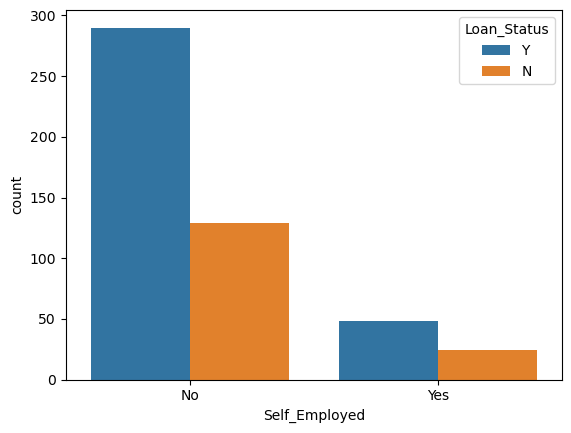

In [7]:
sns.countplot(train.Self_Employed,hue=train.Loan_Status)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

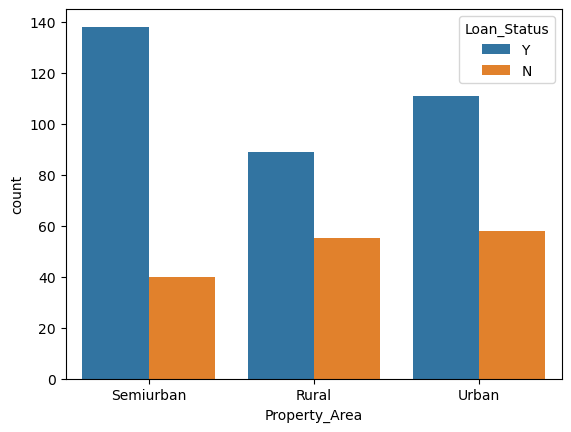

In [8]:
sns.countplot(train.Property_Area,hue=train.Loan_Status)

In [9]:
train = pd.concat([train,pd.get_dummies(train.Gender,prefix='Gender')],axis=1)
train = pd.concat([train,pd.get_dummies(train.Married,prefix='Married')],axis=1)
train.drop(['Gender','Married'],axis=1,inplace=True)

In [10]:
train['FamilyIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [11]:
train.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,FamilyIncome
0,LP002051,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban,Y,0,1,0,1,4567.0
1,LP002255,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y,0,1,1,0,9167.0
2,LP002877,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural,Y,0,1,0,1,4014.0
3,LP002931,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N,0,1,0,1,6000.0
4,LP002743,0,Graduate,No,2138,0.0,99.0,360.0,0.0,Semiurban,N,1,0,1,0,2138.0


In [12]:
dep_map = {'0':0,'1':1,'2':2,'3+':4}
self_emp = {'Yes':1,'No':0}
grad = {'Graduate':1,'Not Graduate':0}
prp_area = {'Urban':2,'Semiurban':1,'Rural':0}
loan_sts = {'Y':1,'N':0}
loan_term = {480:480/12, 360:360/12, 300:300/12, 240:240/12, 180:180/12, 120:120/12, 84:84/12, 60:60/12, 36:36/12, 12:12/12}

In [13]:
train.Dependents = train.Dependents.map(dep_map)
train.Self_Employed = train.Self_Employed.map(self_emp)
train.Education = train.Education.map(grad)
train.Property_Area = train.Property_Area.map(prp_area)
train.Loan_Status = train.Loan_Status.map(loan_sts)
train.Loan_Amount_Term = train.Loan_Amount_Term.map(loan_term)

In [14]:
train

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,FamilyIncome
0,LP002051,0,1,0,2400,2167.0,115.0,30.0,1.0,1,1,0,1,0,1,4567.0
1,LP002255,4,1,0,9167,0.0,185.0,30.0,1.0,0,1,0,1,1,0,9167.0
2,LP002877,1,1,0,1782,2232.0,107.0,30.0,1.0,0,1,0,1,0,1,4014.0
3,LP002931,2,1,1,6000,0.0,205.0,20.0,1.0,1,0,0,1,0,1,6000.0
4,LP002743,0,1,0,2138,0.0,99.0,30.0,0.0,1,0,1,0,1,0,2138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,LP002888,0,1,0,3182,2917.0,161.0,30.0,1.0,2,1,0,1,1,0,6099.0
487,LP002615,2,1,0,4865,5624.0,208.0,30.0,1.0,1,1,0,1,0,1,10489.0
488,LP002738,2,1,0,3617,0.0,107.0,30.0,1.0,1,1,0,1,1,0,3617.0
489,LP001666,0,1,0,8333,3750.0,187.0,30.0,1.0,0,1,0,1,1,0,12083.0


In [15]:
for i in train.columns[1:-2]:
    print(f"NA value ratio in {i}")
    print((len(train[train[i].isna()])/train.shape[0])*100,'%' ,"\n")

NA value ratio in Dependents
0.0 % 

NA value ratio in Education
0.0 % 

NA value ratio in Self_Employed
0.0 % 

NA value ratio in ApplicantIncome
0.0 % 

NA value ratio in CoapplicantIncome
0.0 % 

NA value ratio in LoanAmount
3.462321792260693 % 

NA value ratio in Loan_Amount_Term
0.0 % 

NA value ratio in Credit_History
8.961303462321792 % 

NA value ratio in Property_Area
0.0 % 

NA value ratio in Loan_Status
0.0 % 

NA value ratio in Gender_Female
0.0 % 

NA value ratio in Gender_Male
0.0 % 

NA value ratio in Married_No
0.0 % 



In [16]:
train.Credit_History = train.Credit_History.astype('object')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Dependents         491 non-null    int64  
 2   Education          491 non-null    int64  
 3   Self_Employed      491 non-null    int64  
 4   ApplicantIncome    491 non-null    int64  
 5   CoapplicantIncome  491 non-null    float64
 6   LoanAmount         474 non-null    float64
 7   Loan_Amount_Term   491 non-null    float64
 8   Credit_History     447 non-null    object 
 9   Property_Area      491 non-null    int64  
 10  Loan_Status        491 non-null    int64  
 11  Gender_Female      491 non-null    uint8  
 12  Gender_Male        491 non-null    uint8  
 13  Married_No         491 non-null    uint8  
 14  Married_Yes        491 non-null    uint8  
 15  FamilyIncome       491 non-null    float64
dtypes: float64(4), int64(6), o

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_filled = imputer.fit_transform(train[['Credit_History']])

In [19]:
ch_arr = [1 if i > 0 else 0 for i in df_filled]

In [20]:
train.Credit_History = ch_arr

# To fill the NaN in LoanAmount 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FamilyIncome', ylabel='Density'>

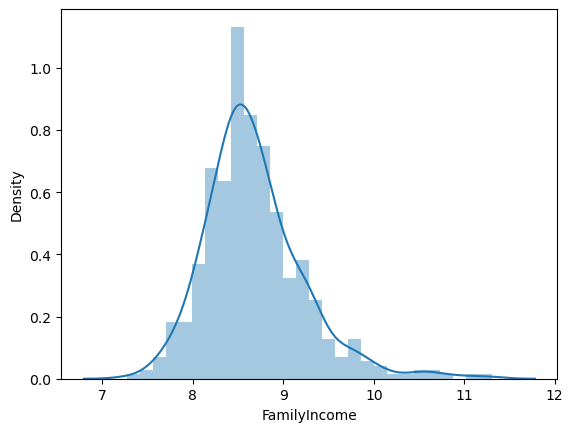

In [21]:
sns.distplot(np.log(train.FamilyIncome))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FamilyIncome', ylabel='LoanAmount'>

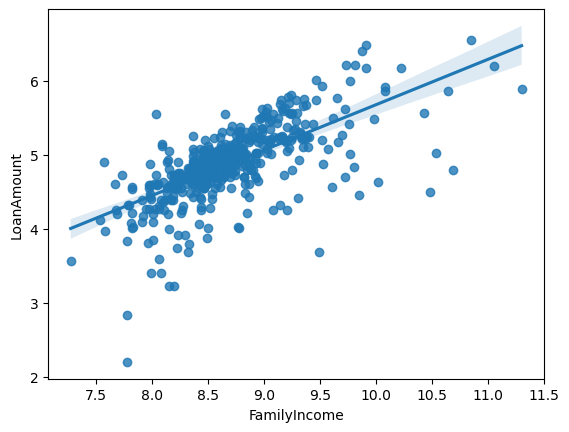

In [22]:
sns.regplot(np.log((train.FamilyIncome)),np.log(train.LoanAmount))

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
test_index = train[train['LoanAmount'].isna()].index

In [25]:
train_X = np.log(train[~train.index.isin(test_index)]['FamilyIncome'])
test_X = np.log(train[train.index.isin(test_index)]['FamilyIncome'])

train_y = np.log(train[~train['LoanAmount'].isna()]['LoanAmount'])
test_y = train[train['LoanAmount'].isna()]['LoanAmount']

lr = LinearRegression()
lr.fit(np.array(train_X).reshape(-1, 1),np.array(train_y).reshape(-1, 1))

LinearRegression()

In [26]:
train.loc[train.index.isin(test_index),'LoanAmount'] = np.exp(lr.predict(np.array(test_X).reshape(-1,1)))

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Dependents         491 non-null    int64  
 2   Education          491 non-null    int64  
 3   Self_Employed      491 non-null    int64  
 4   ApplicantIncome    491 non-null    int64  
 5   CoapplicantIncome  491 non-null    float64
 6   LoanAmount         491 non-null    float64
 7   Loan_Amount_Term   491 non-null    float64
 8   Credit_History     491 non-null    int64  
 9   Property_Area      491 non-null    int64  
 10  Loan_Status        491 non-null    int64  
 11  Gender_Female      491 non-null    uint8  
 12  Gender_Male        491 non-null    uint8  
 13  Married_No         491 non-null    uint8  
 14  Married_Yes        491 non-null    uint8  
 15  FamilyIncome       491 non-null    float64
dtypes: float64(4), int64(7), o

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

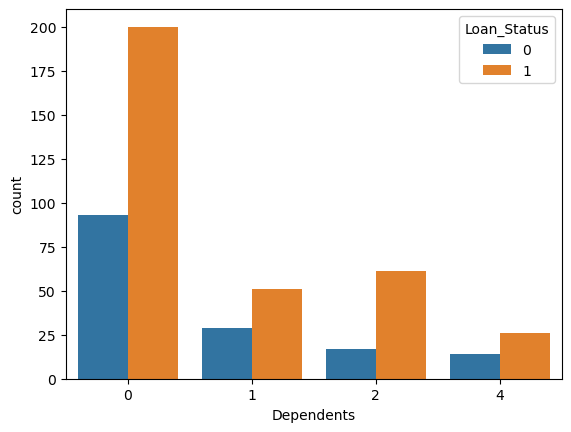

In [28]:
sns.countplot(train['Dependents'],hue=train['Loan_Status'])

> - Ratio of Loan accepted to loan rejected is higher of people who doesn't have dependendents, lower for people have 3+ dependents.

In [29]:
train['IncomePermember'] = np.where(train['Dependents'] != 0, train['FamilyIncome'] / train['Dependents'], train['FamilyIncome'])

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

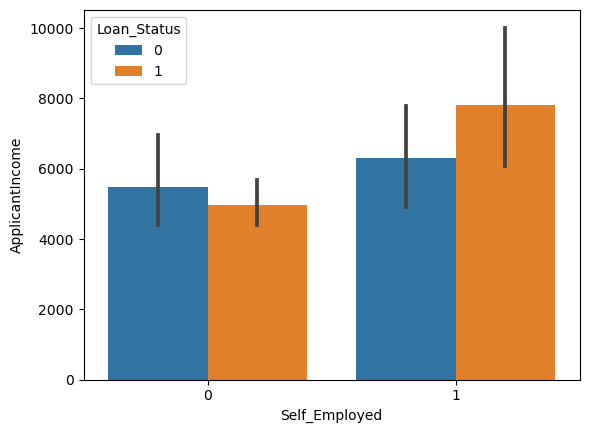

In [30]:
sns.barplot(x=train.Self_Employed,y=train.ApplicantIncome,hue=train.Loan_Status)

<AxesSubplot:xlabel='Self_Employed', ylabel='CoapplicantIncome'>

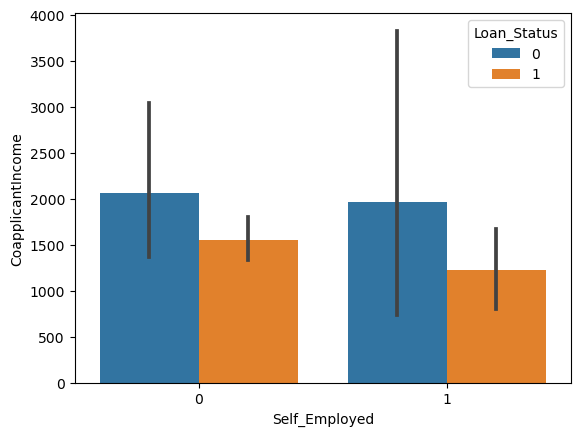

In [31]:
sns.barplot(x=train.Self_Employed,y=train.CoapplicantIncome,hue=train.Loan_Status)

In [32]:
train.columns

Index(['Loan_ID', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'FamilyIncome', 'IncomePermember'],
      dtype='object')

In [33]:
X = train[['Gender_Female','Gender_Male','Married_No','Married_Yes', 'Education', 'Self_Employed'
       ,'Credit_History', 'Property_Area','Loan_Amount_Term','IncomePermember','LoanAmount']]
y = train.Loan_Status

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ar = sc.fit_transform(X_train.iloc[:,:-2])
X_test_ar = sc.transform(X_test.iloc[:,:-2])

In [36]:
a = pd.DataFrame(X_train_ar)
c = pd.DataFrame(X_test_ar)

In [37]:
b = pd.DataFrame(np.log(X_train.iloc[:,-2:]))
d = pd.DataFrame(np.log(X_test.iloc[:,-2:]))

In [38]:
a.reset_index(drop=True,inplace=True)
b.reset_index(drop=True,inplace=True)
c.reset_index(drop=True,inplace=True)
d.reset_index(drop=True,inplace=True)

In [39]:
X_train = pd.concat([a, b],axis=1)
X_test = pd.concat([c, d],axis=1)

In [40]:
X_train

,0,1,2,3,4,5,6,7,8,IncomePermember,LoanAmount
0,-0.502390,0.502390,-0.741220,0.741220,0.458123,-0.425115,0.416717,-1.321314,0.288241,8.552946,4.682131
1,-0.502390,0.502390,-0.741220,0.741220,0.458123,-0.425115,-2.399713,-1.321314,0.288241,7.833996,5.010635
2,-0.502390,0.502390,-0.741220,0.741220,0.458123,-0.425115,0.416717,1.174855,0.288241,9.242808,5.192957
3,1.990484,-1.990484,1.349127,-1.349127,0.458123,-0.425115,0.416717,-0.073229,0.288241,7.978311,4.430817
4,1.990484,-1.990484,1.349127,-1.349127,-2.182821,-0.425115,-2.399713,1.174855,0.288241,6.125777,4.146822
...,...,...,...,...,...,...,...,...,...,...,...
387,1.990484,-1.990484,1.349127,-1.349127,0.458123,-0.425115,0.416717,-1.321314,0.288241,8.881836,4.787492
388,-0.502390,0.502390,1.349127,-1.349127,0.458123,-0.425115,0.416717,1.174855,0.288241,9.339261,5.214936
389,-0.502390,0.502390,-0.741220,0.741220,0.458123,-0.425115,0.416717,-0.073229,0.288241,9.196444,5.164786
390,-0.502390,0.502390,-0.741220,0.741220,0.458123,-0.425115,0.416717,1.174855,-2.503942,11.056225,6.194405


In [82]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
rfc = RandomForestClassifier(random_state=0)

In [83]:
rfc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(random_state=0)

In [84]:
y_pred = rfc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [85]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[11 20]
 [ 8 60]]
0.75
0.8823529411764706
0.7171717171717171


# Predict on val set

In [45]:
val.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001736,Male,Yes,0,Graduate,No,2221,0,60.0,360.0,0.0,Urban
1,LP001384,Male,Yes,3+,Not Graduate,No,2071,754,94.0,480.0,1.0,Semiurban
2,LP002841,Male,Yes,0,Graduate,No,3166,2064,104.0,360.0,0.0,Urban
3,LP002097,Male,No,1,Graduate,No,4384,1793,117.0,360.0,1.0,Urban
4,LP002314,Female,No,0,Not Graduate,No,2213,0,66.0,360.0,1.0,Rural


In [46]:
for i in val.columns[1:-2]:
    if val[i].dtype == 'object':
        val[i].fillna(val[i].mode()[0],inplace = True)
val["Loan_Amount_Term"].fillna(val["Loan_Amount_Term"].mode()[0],inplace = True)

In [47]:
val = pd.concat([val,pd.get_dummies(val.Gender,prefix='Gender')],axis=1)
val = pd.concat([val,pd.get_dummies(val.Married,prefix='Married')],axis=1)
val.drop(['Gender','Married'],axis=1,inplace=True)

In [48]:
val['FamilyIncome'] = val['ApplicantIncome'] + val['CoapplicantIncome']

In [49]:
val.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,FamilyIncome
0,LP001736,0,Graduate,No,2221,0,60.0,360.0,0.0,Urban,0,1,0,1,2221
1,LP001384,3+,Not Graduate,No,2071,754,94.0,480.0,1.0,Semiurban,0,1,0,1,2825
2,LP002841,0,Graduate,No,3166,2064,104.0,360.0,0.0,Urban,0,1,0,1,5230
3,LP002097,1,Graduate,No,4384,1793,117.0,360.0,1.0,Urban,0,1,1,0,6177
4,LP002314,0,Not Graduate,No,2213,0,66.0,360.0,1.0,Rural,1,0,1,0,2213


In [50]:
val.Dependents = val.Dependents.map(dep_map)
val.Self_Employed = val.Self_Employed.map(self_emp)
val.Education = val.Education.map(grad)
val.Property_Area = val.Property_Area.map(prp_area)
val.Loan_Amount_Term = val.Loan_Amount_Term.map(loan_term)

In [51]:
val

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,FamilyIncome
0,LP001736,0,1,0,2221,0,60.0,30.0,0.0,2,0,1,0,1,2221
1,LP001384,4,0,0,2071,754,94.0,40.0,1.0,1,0,1,0,1,2825
2,LP002841,0,1,0,3166,2064,104.0,30.0,0.0,2,0,1,0,1,5230
3,LP002097,1,1,0,4384,1793,117.0,30.0,1.0,2,0,1,1,0,6177
4,LP002314,0,0,0,2213,0,66.0,30.0,1.0,0,1,0,1,0,2213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,LP001050,2,0,0,3365,1917,112.0,30.0,0.0,0,0,1,0,1,5282
119,LP002055,0,1,0,3166,2985,132.0,30.0,NaN,0,1,0,1,0,6151
120,LP002128,2,1,0,2583,2330,125.0,30.0,1.0,0,0,1,0,1,4913
121,LP001770,0,0,0,3189,2598,120.0,30.0,1.0,0,0,1,1,0,5787


In [52]:
for i in val.columns[1:-2]:
    print(f"NA value ratio in {i}")
    print((len(val[val[i].isna()])/val.shape[0])*100,'%' ,"\n")

NA value ratio in Dependents
0.0 % 

NA value ratio in Education
0.0 % 

NA value ratio in Self_Employed
0.0 % 

NA value ratio in ApplicantIncome
0.0 % 

NA value ratio in CoapplicantIncome
0.0 % 

NA value ratio in LoanAmount
4.0650406504065035 % 

NA value ratio in Loan_Amount_Term
0.0 % 

NA value ratio in Credit_History
4.878048780487805 % 

NA value ratio in Property_Area
0.0 % 

NA value ratio in Gender_Female
0.0 % 

NA value ratio in Gender_Male
0.0 % 

NA value ratio in Married_No
0.0 % 



In [53]:
val.Credit_History = val.Credit_History.astype('object')

In [54]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Dependents         123 non-null    int64  
 2   Education          123 non-null    int64  
 3   Self_Employed      123 non-null    int64  
 4   ApplicantIncome    123 non-null    int64  
 5   CoapplicantIncome  123 non-null    int64  
 6   LoanAmount         118 non-null    float64
 7   Loan_Amount_Term   123 non-null    float64
 8   Credit_History     117 non-null    object 
 9   Property_Area      123 non-null    int64  
 10  Gender_Female      123 non-null    uint8  
 11  Gender_Male        123 non-null    uint8  
 12  Married_No         123 non-null    uint8  
 13  Married_Yes        123 non-null    uint8  
 14  FamilyIncome       123 non-null    int64  
dtypes: float64(2), int64(7), object(2), uint8(4)
memory usage: 11.2+ KB


In [55]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_filled = imputer.fit_transform(val[['Credit_History']])

In [56]:
ch_arr = [1 if i > 0 else 0 for i in df_filled]

In [57]:
val.Credit_History = ch_arr

# To fill the NaN in LoanAmount 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FamilyIncome', ylabel='Density'>

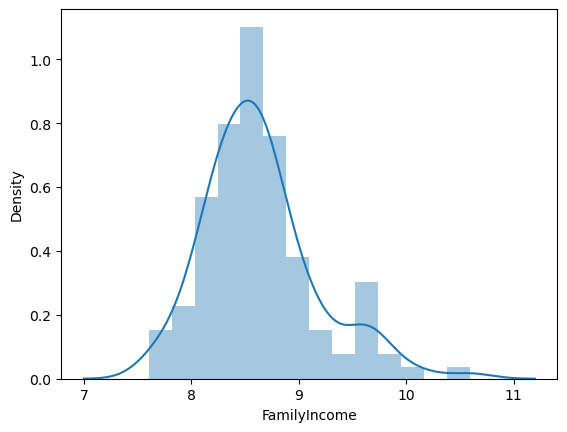

In [58]:
sns.distplot(np.log(val.FamilyIncome))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FamilyIncome', ylabel='LoanAmount'>

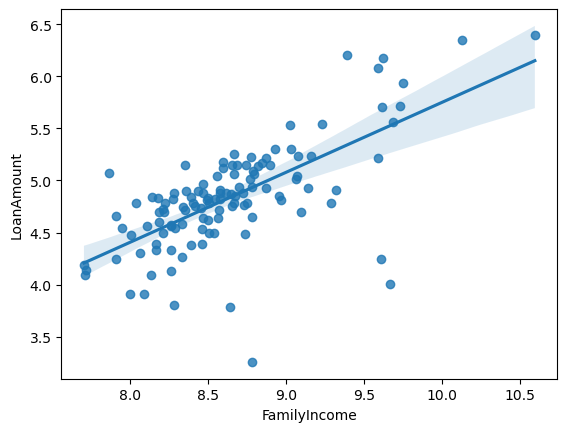

In [59]:
sns.regplot(np.log((val.FamilyIncome)),np.log(val.LoanAmount))

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
test_index = val[val['LoanAmount'].isna()].index

In [62]:
train_X = np.log(val[~val.index.isin(test_index)]['FamilyIncome'])
test_X = np.log(val[val.index.isin(test_index)]['FamilyIncome'])

train_y = np.log(val[~val['LoanAmount'].isna()]['LoanAmount'])
test_y = val[val['LoanAmount'].isna()]['LoanAmount']

lr = LinearRegression()
lr.fit(np.array(train_X).reshape(-1, 1),np.array(train_y).reshape(-1, 1))

LinearRegression()

In [63]:
val.loc[val.index.isin(test_index),'LoanAmount'] = np.exp(lr.predict(np.array(test_X).reshape(-1,1)))

In [64]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Dependents         123 non-null    int64  
 2   Education          123 non-null    int64  
 3   Self_Employed      123 non-null    int64  
 4   ApplicantIncome    123 non-null    int64  
 5   CoapplicantIncome  123 non-null    int64  
 6   LoanAmount         123 non-null    float64
 7   Loan_Amount_Term   123 non-null    float64
 8   Credit_History     123 non-null    int64  
 9   Property_Area      123 non-null    int64  
 10  Gender_Female      123 non-null    uint8  
 11  Gender_Male        123 non-null    uint8  
 12  Married_No         123 non-null    uint8  
 13  Married_Yes        123 non-null    uint8  
 14  FamilyIncome       123 non-null    int64  
dtypes: float64(2), int64(8), object(1), uint8(4)
memory usage: 11.2+ KB


In [65]:
val['IncomePermember'] = np.where(val['Dependents'] != 0, val['FamilyIncome'] / val['Dependents'], val['FamilyIncome'])

In [66]:
val.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Married_No,Married_Yes,FamilyIncome,IncomePermember
0,LP001736,0,1,0,2221,0,60.0,30.0,0,2,0,1,0,1,2221,2221.00
1,LP001384,4,0,0,2071,754,94.0,40.0,1,1,0,1,0,1,2825,706.25
2,LP002841,0,1,0,3166,2064,104.0,30.0,0,2,0,1,0,1,5230,5230.00
3,LP002097,1,1,0,4384,1793,117.0,30.0,1,2,0,1,1,0,6177,6177.00
4,LP002314,0,0,0,2213,0,66.0,30.0,1,0,1,0,1,0,2213,2213.00


# scalling and prediction of validation set

In [67]:
val = val[['Gender_Female','Gender_Male','Married_No','Married_Yes', 'Education', 'Self_Employed'
       ,'Credit_History', 'Property_Area','Loan_Amount_Term','IncomePermember','LoanAmount']]

In [68]:
X_val = sc.transform(val.iloc[:,:-2])

In [69]:
a = pd.DataFrame(X_val)

In [70]:
b = pd.DataFrame(np.log(val.iloc[:,-2:]))

In [71]:
a.reset_index(drop=True,inplace=True)
b.reset_index(drop=True,inplace=True)

In [72]:
val_set = pd.concat([a, b],axis=1)

In [73]:
val_pred = rfc.predict(val_set)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [74]:
val_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [86]:
ls = ["Y" if i == 1 else "N" for i in val_pred]

In [75]:
val_ind = pd.read_csv(r"validation.csv").iloc[:,0]

In [88]:
val["Loan_ID"] = val_ind
val["Loan_Status"] = ls

C:\Users\amit.mane\AppData\Local\Temp\ipykernel_26132\3624821811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["Loan_ID"] = val_ind
C:\Users\amit.mane\AppData\Local\Temp\ipykernel_26132\3624821811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["Loan_Status"] = ls


In [89]:
val[['Loan_ID','Loan_Status']].to_csv(r"results.csv",index=False)